# PyPlot
In this notebook we will take a look at using `matplotlib` from within Julia. Technically, all we are doing is calling the core Python libraries through a wrapper. So, we'll need to make sure that we have `matplotlib` installed.

The functionality of `matplotlib` is almost entirely supported, so any questions about "how to" make a certain chart can be directed to the `matplotlib` [documentation](http://matplotlib.org).

Also be sure to check out the `matplotlib` [gallery](http://matplotlib.org/gallery.html) to see many examples of plots which can also be implemented in Julia.

In [1]:
Pkg.add("Conda")            # A wrapper for the python package manager
using Conda 
Conda.add("matplotlib")     # Install a local copy of matplotlib
Pkg.add("PyCall")           # The Python Wrapper 
Pkg.build("PyCall")         # Set paths
Pkg.add("PyPlot")           # Wrapper for Matplotlib calls

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Conda
INFO: Use `Pkg.update()` to get the latest versions of your packages


Fetching package metadata: ....
Solving package specifications: .........

# All requested packages already installed.
# packages in environment at /Users/eric/.julia/v0.4/Conda/deps/usr:
#
matplotlib                1.5.1               np111py27_0  


INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyCall
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Building PyCall
INFO: PyCall is using /usr/local/opt/python/bin/python2.7 (Python 2.7.11) at /usr/local/opt/python/bin/python2.7, libpython = /usr/local/Cellar/python/2.7.11/Frameworks/Python.framework/Versions/2.7/Python
INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


Now that we're sure everything is installed, lets try it out!

In [2]:
using PyPlot

INFO: Recompiling stale cache file /Users/eric/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/eric/.julia/lib/v0.4/PyPlot.ji for module PyPlot.


Lets start with a basic line plot.

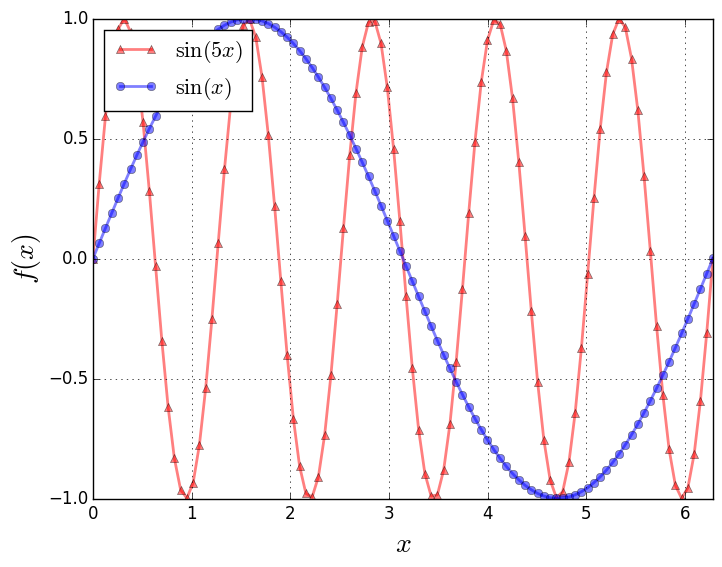

In [8]:
# A basic line plot
x = linspace(0,2*pi,100)

# Plot Two Curves
plot(x, sin(5*x), lw = 2, color = "r", marker = "^", alpha = 0.5,
                  label = L"\sin(5x)")
plot(x, sin(x), lw = 2, color = "b", marker = "o", alpha = 0.5,
                label = L"\sin(x)")

# Add Labelling
xlabel(L"x", fontsize = 20)
ylabel(L"f(x)", fontsize = 20)
grid("on")
xlim(0,2*pi)
ylim(-1,1)
legend(loc=2, fontsize =16)

# Write figure to disk
savefig("tmp.pdf")

Okay, lets try something else out. What about a scatter plot?

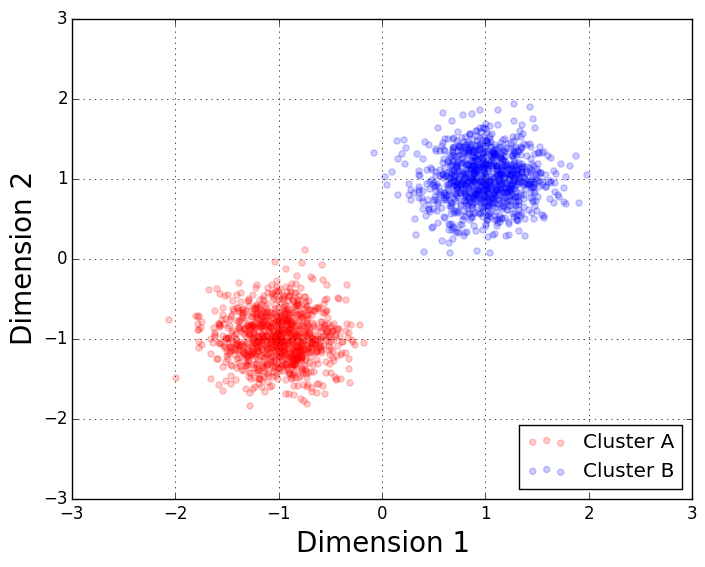

PyObject <matplotlib.legend.Legend object at 0x30b2c4850>

In [9]:
pts = 1000
clusterA = 0.3*randn(pts,2) .+ [-1 -1]
clusterB = 0.3*randn(pts,2) .+ [1  1]

# Make the scatter plot
scatter(clusterA[:,1],clusterA[:,2], color = "r", alpha = 0.2, label = "Cluster A")
scatter(clusterB[:,1],clusterB[:,2], color = "b", alpha = 0.2, label = "Cluster B")

# Write labels
grid("on")
xlabel("Dimension 1", fontsize = 20)
ylabel("Dimension 2", fontsize = 20)
legend(loc = 4)

So what if we wanted to do a two-dimensional histogram of these clusters? Well, looking at `matplotlib` it seems we should do something like the following...

In [11]:
hist2d(clusterA[:,1],clusterA[:,2], bins = 40)

LoadError: LoadError: ArgumentError: function hist2d does not accept keyword arguments
while loading In[11], in expression starting on line 1

Whups! It seems like something is wrong here. Specifically, there is a conflict in naming between `hist` and `hist2d` in `matplotlib` and in Julia's base code. So, we'll have to do something a big different to get at these functions. In PyPlot, these functions are renamed with a capital "D", e.g. `hist2D`. 

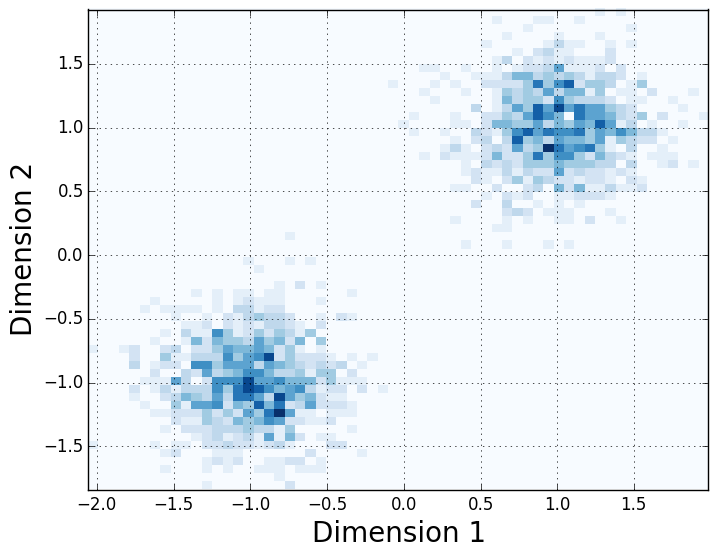

In [12]:
hist2D([clusterA[:,1];clusterB[:,1]],[clusterA[:,2];clusterB[:,2]], bins = 60, cmap = "Blues");

# Write Labels
xlabel("Dimension 1", fontsize = 20)
ylabel("Dimension 2", fontsize = 20)
grid("on")

Personally, this kind of histogram is not so visuallay appealing, so one can opt for `hexbin`.

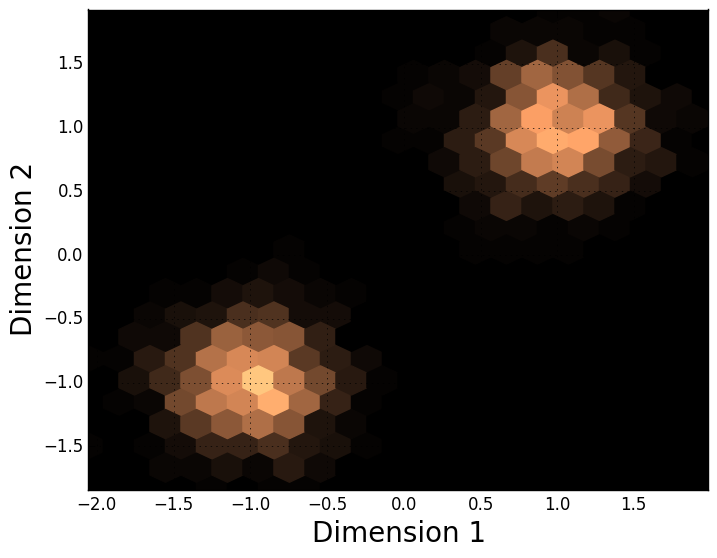

In [18]:
hexbin([clusterA[:,1];clusterB[:,1]],[clusterA[:,2];clusterB[:,2]], gridsize = 20, cmap = "copper");

# Write Labels
xlabel("Dimension 1", fontsize = 20)
ylabel("Dimension 2", fontsize = 20)
grid("on")

What about a simple one dimensional histogram plot? Lets also make use of the [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) package!

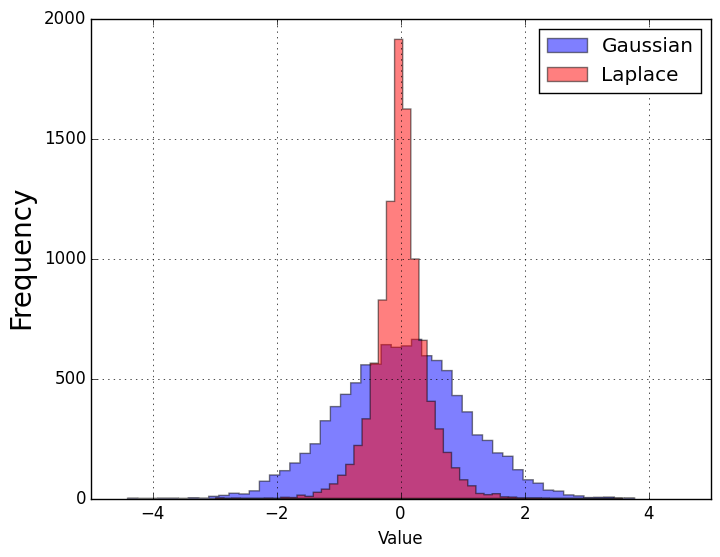

PyObject <matplotlib.legend.Legend object at 0x31d8c1550>

In [20]:
# Random Data
using Distributions
x = rand(Normal(),10000)
y = rand(Laplace(0,0.3),10000)

# Make a histogram...note the PyCall-specific reference since
# "hist" conflicts with the Julia base function.
hold("on")
plt[:hist](x, bins = 50, histtype = "stepfilled", alpha = 0.5, color = "b", label = "Gaussian")
plt[:hist](y, bins = 50, histtype = "stepfilled", alpha = 0.5, color = "r", label = "Laplace")
hold("off")

# Write Labels
grid("on")
xlim(-5,5)
ylabel("Frequency",fontsize = 20)
xlabel("Value")
legend()

And, we can also display matrix contents, as well.

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of TestImages
INFO: Use `Pkg.update()` to get the latest versions of your packages


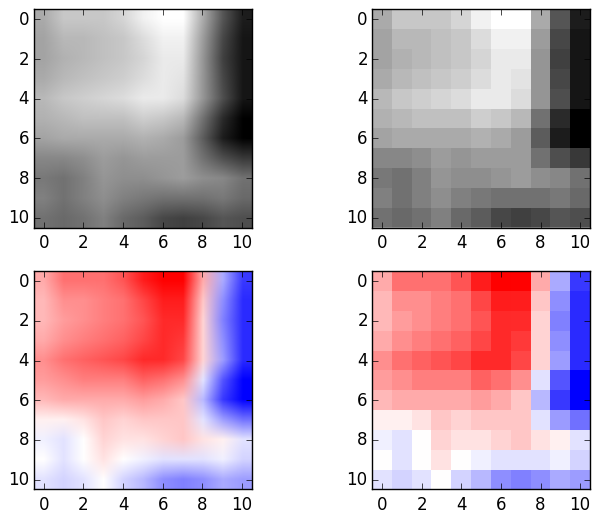

PyObject <matplotlib.image.AxesImage object at 0x31d3f7e10>

In [23]:
Pkg.add("TestImages")
using TestImages

# Load a test image and convert it to an array of floating point
# values in the range [0,1]
img = testimage("cameraman")
img = convert(Array,img);
img = convert(Array{Float64},img[300:310,400:410])

# Show the data
_,ax = subplots(2,2)
ax[1,1][:imshow](img, cmap = "gray", aspect = "equal")
ax[1,2][:imshow](img, interpolation = "None", cmap = "gray", aspect = "equal")
ax[2,1][:imshow](img,  cmap = "bwr", aspect = "equal")
ax[2,2][:imshow](img,  interpolation = "None", cmap = "bwr", aspect = "equal")

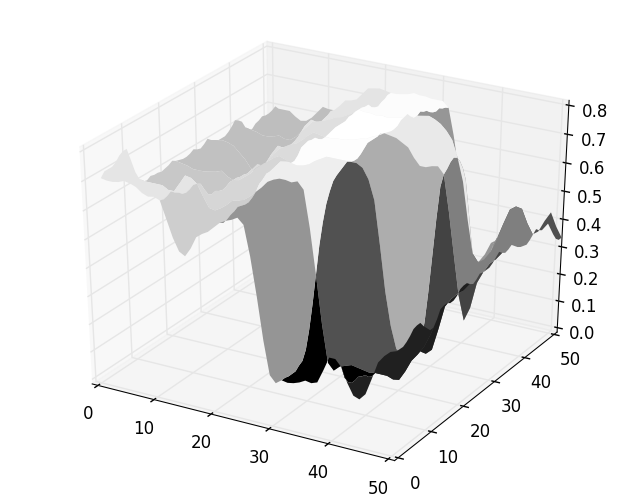

(0,50)

In [173]:
surf(img,edgecolor = "none", cmap = "gray", shade = true)
xlim(0,50)
ylim(0,50)

In [25]:
?matshow

search: matshow




    Display an array as a matrix in a new figure window.

    The origin is set at the upper left hand corner and rows (first
    dimension of the array) are displayed horizontally.  The aspect
    ratio of the figure window is that of the array, unless this would
    make an excessively short or narrow figure.

    Tick labels for the xaxis are placed on top.

    With the exception of *fignum*, keyword arguments are passed to
    :func:`~matplotlib.pyplot.imshow`.  You may set the *origin*
    kwarg to "lower" if you want the first row in the array to be
    at the bottom instead of the top.


    *fignum*: [ None | integer | False ]
      By default, :func:`matshow` creates a new figure window with
      automatic numbering.  If *fignum* is given as an integer, the
      created figure will use this figure number.  Because of how
      :func:`matshow` tries to set the figure aspect ratio to be the
      one of the array, if you provide the number of an already
      existing figure

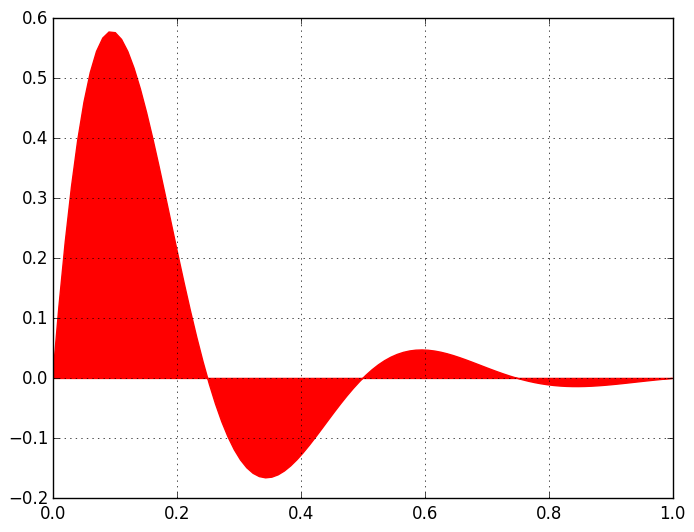

In [35]:
#x = np.linspace(0, 1)
#y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

#plt.fill(x, y, 'r')
#plt.grid(True)
#plt.show()

x = linspace(0,1,100)
y = sin(4*pi*x) .* exp(-5.*x)
plt[:fill](x,y, color = "r")
grid("on")

In [46]:
using PyCall
@pyimport matplotlib.pyplot as A